In [576]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 8)
matplotlib.rcParams.update({'font.size': 15})


In [577]:
def get_range(t,L):
    # takes the luminosity history and returns the indices corresponding to a single flash
    L0 = 0.5 * (max(L)+min(L))

    i = len(L)-1
    while L[i] > L0:
        i = i-1
    i2 = i
    while L[i] < L0:
        i = i-1
    while L[i] > L0:
        i = i-1
    i1 = i
    
    return i1, i2

In [578]:
Lsun = 3.8418e33
Msun = 1.9892e33
Rsun = 6.9598e10
cgrav = 6.67428e-8
secyear = 3.1558149984e7

In [579]:
data = np.genfromtxt('LOGS/history.data', names=True, skip_header=5)
t = data['star_age']
L = data['log_L']
Ledd = data['log_Ledd']
#Ledd1 = L - np.log10(data['surf_avg_Lrad_div_Ledd'])
Mdot = data['log_abs_mdot']
MH = data['h_rich_layer_mass']
TH = data['max_eps_h_lgT']
PH = data['max_eps_h_lgP']
scale_height = data['max_eps_nuc_H'] / Rsun
RH = 10.0**data['max_eps_nuc_lgR'] / Rsun
Lnuc = data['log_Lnuc']
mass = data['star_mass']   # Msun units
radius = 10.0**data['log_R']  # Rsun units
print('final M,R = ', mass[-1], radius[-1])
Teff = 10.0**data['log_Teff']

final M,R =  0.6046840802910554 0.014287892767638026


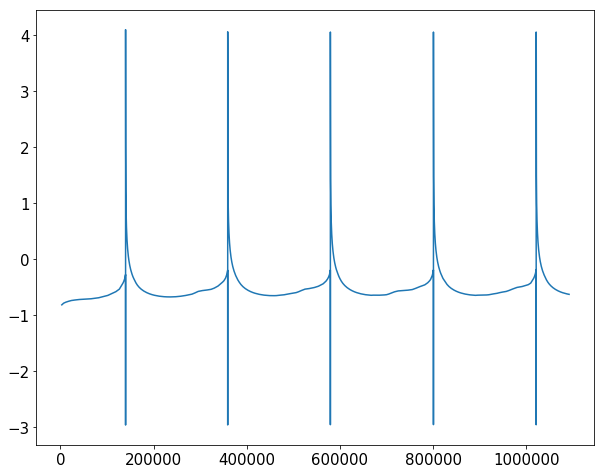

In [580]:
plt.plot(t,L)

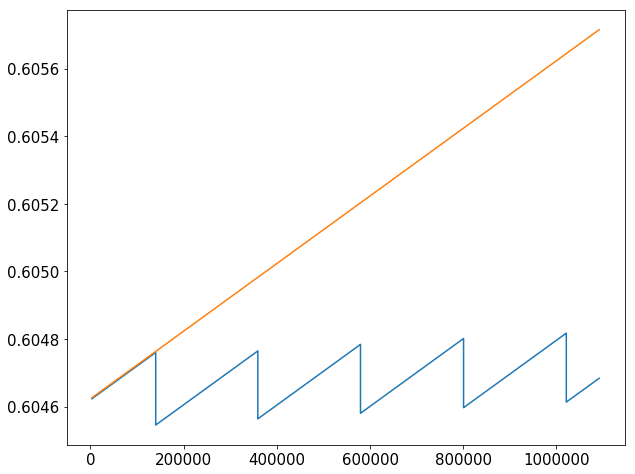

In [581]:
plt.plot(t,mass)   # plot the white dwarf mass over the run
plt.plot(t, 1e-9*t + mass[0])    # compared to the accreted mass

In [582]:
# Extract the last nova from the sequence
i1, i2 = get_range(t,Lnuc)
print('Found flash between t = %f and %f' % (t[i1],t[i2]))

t1 = t[i1:i2]
L1 = L[i1:i2]
Ledd = Ledd[i1:i2]
Lnuc = Lnuc[i1:i2]
Mdot = Mdot[i1:i2]
Teff = Teff[i1:i2]
scale_height = scale_height[i1:i2]
radius = radius[i1:i2]
RH = RH[i1:i2]


# recurrence time
i3, i4 = get_range(t[:i1],L[:i1])
print('Recurrence time = ', t[i1]-t[i3], ' yrs')
print('Accreted mass = ', 1e-9 * (t[i1]-t[i3]))

# ignition mass
Mign = max(MH[i1:i2])
print('Ignition mass = ', Mign)

# Mass ejected
Mej = 0.0
for i in range(len(t1)-1):
    dt = t1[i+1]-t1[i]
    dm = 10.0**Mdot[i+1] * dt
    Mej = Mej + dm
print("Mass ejected = ", Mej)

# burning conditions
print('Max temperature = ', max(TH[i1:i2]))
print('Max pressure = ', max(PH[i1:i2]))

# Eddington luminosity (for electron scattering opacity, X=0.7)
Ledd1 = 4.0*np.pi*cgrav*Msun*mass[-1]*3e10 / (0.2*1.7) / Lsun
print("Ledd/Lsun ~ ", Ledd1)


Found flash between t = 1021271.302207 and 1091902.990054
Recurrence time =  220481.56312669313  yrs
Accreted mass =  0.00022048156312669314
Ignition mass =  0.0002650680112978865
Mass ejected =  0.00027014748989817784
Max temperature =  8.05844649101709
Max pressure =  18.68153231783887
Ledd/Lsun ~  23170.150635289327


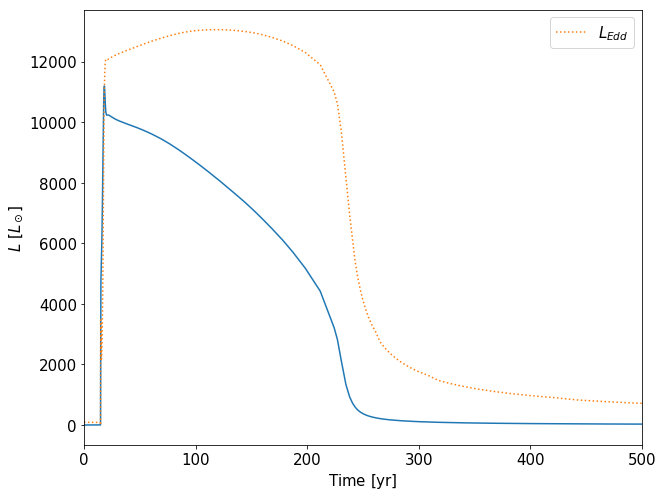

In [583]:
# set the start time to zero
t1 = t1 - t1[0]

plt.xlabel(r'${\rm Time}\ [{\rm yr}]$')
plt.ylabel(r'$L\ [L_\odot]$')

plt.plot(t1,10.0**L1)
plt.plot(t1,10.0**Ledd,':', label=r'$L_{Edd}$')

plt.xlim((-0.1,500.0))
plt.legend()

(14.0, 20.0)

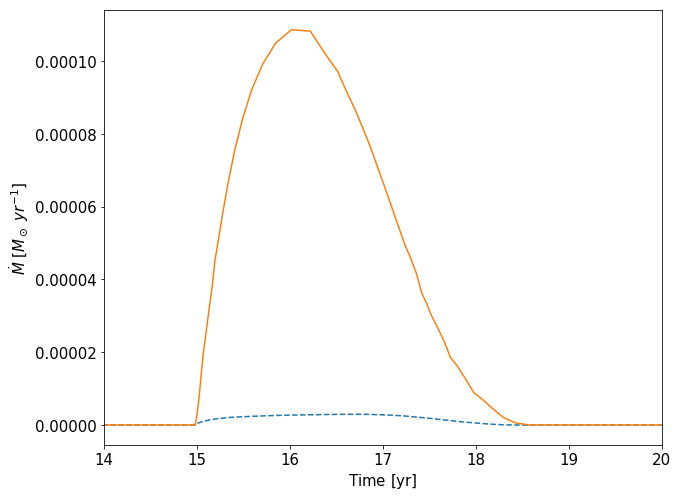

In [591]:
# Calculate the excess luminosity
deltaL = 10.0**L1 - 10.0**Ledd
deltaL[ deltaL < 0.0 ] = 0.0   # include only positive delta L

# mass loss rate
MdotL = deltaL * Lsun * 7e10 * radius[-1] / (6.67e-8 * Msun * mass[-1])
# convert to solar masses per year
MdotL = MdotL * secyear / Msun

plt.xlabel(r'${\rm Time}\ [{\rm yr}]$')
plt.ylabel(r'$\dot M\ [M_\odot\ yr^{-1}]$')

plt.plot(t1,MdotL,'--')    # our estimate of mdot based on the surface Ledd
plt.plot(t1,10.0**Mdot)    # actual mass loss rate from MESA

plt.xlim((14.0,20.0))

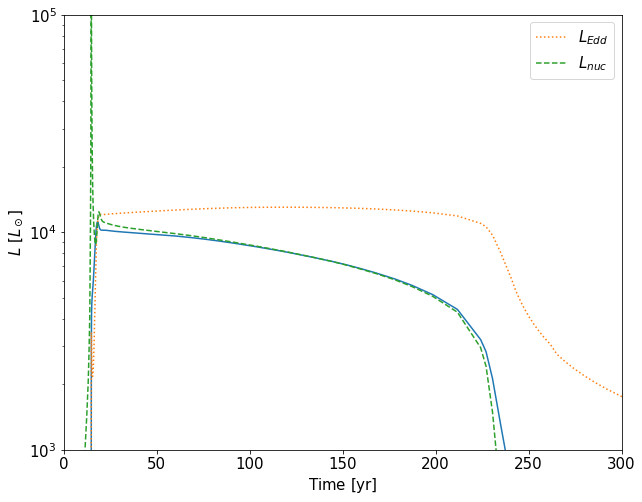

In [594]:
# set the start time to zero
t1 = t1 - t1[0]

plt.xlabel(r'${\rm Time}\ [{\rm yr}]$')
plt.ylabel(r'$L\ [L_\odot]$')

plt.plot(t1,10.0**L1)
plt.plot(t1,10.0**Ledd,':', label=r'$L_{Edd}$')

plt.xlim((0.0,300.0))

#plot the nuclear luminosity, but then best to switch to log scale
plt.plot(t1,10.0**Lnuc,'--', label=r'$L_{nuc}$')
plt.yscale('log')

plt.ylim((1e3,1e5))
plt.legend()

In [586]:
# At a luminosity of 10^4 Lsun, time to burn the fuel is
tburn = 7e18 * Msun * 2e-4 / (Lsun * 1e4)
print('Time to burn accreted mass at 1e-4 Lsun = ', tburn/secyear)

Time to burn accreted mass at 1e-4 Lsun =  2296.995784416265


(-0.1, 250.0)

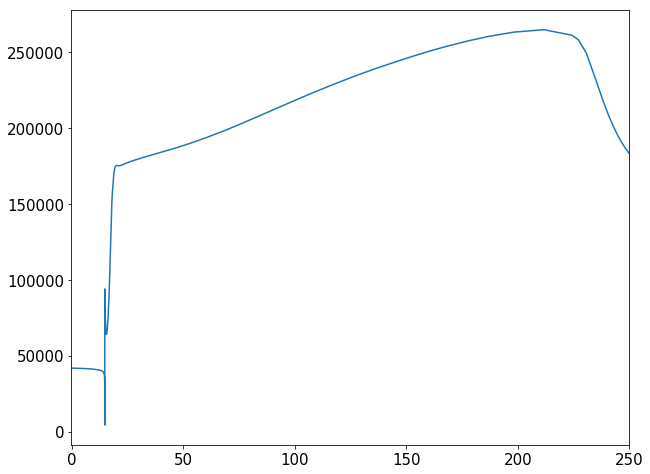

In [587]:
plt.plot(t1,Teff)
plt.xlim((-0.1,250.0))

(-0.1, 250.0)

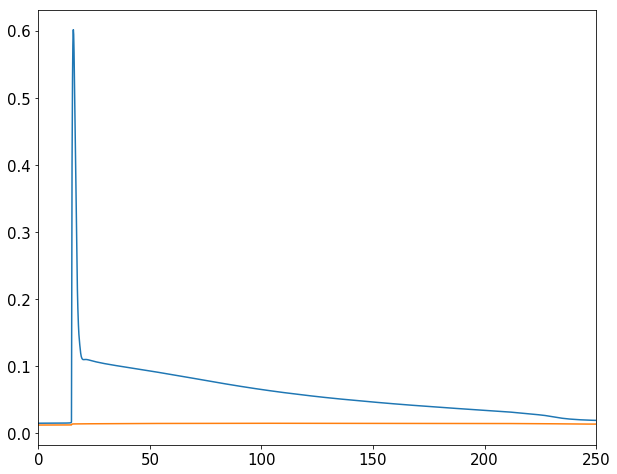

In [588]:
plt.plot(t1,radius)

plt.plot(t1,RH)

plt.xlim((-0.1,250.0))

(-0.1, 250)

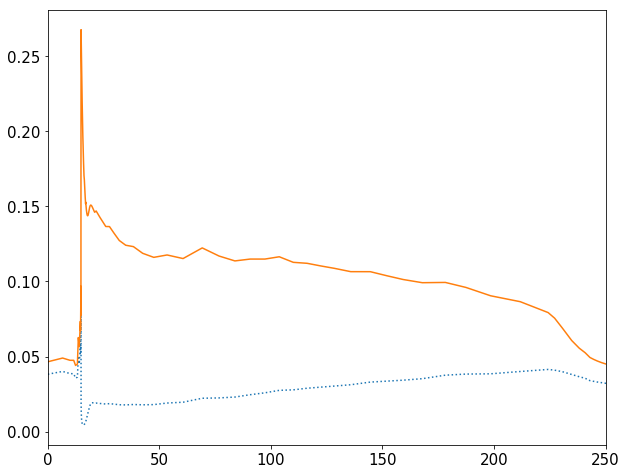

In [597]:
plt.plot(t1,scale_height/radius,':')

plt.plot(t1,scale_height/RH)

plt.xlim((-0.1,250))